In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/FIFA선수 이적료 예측/FIFA_train.csv')
test = pd.read_csv('/content/drive/MyDrive/FIFA선수 이적료 예측/FIFA_test.csv')

df.shape

(8932, 12)

In [3]:
df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [5]:
df.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [6]:
for i in df.columns:
  print(df.value_counts(i))
  print('\n')

id
0        1
10556    1
10546    1
10548    1
10549    1
        ..
5020     1
5017     1
5016     1
5014     1
16948    1
Length: 8932, dtype: int64


name
A. Abdi          1
M. Vera          1
M. Van Damme     1
M. Vantruba      1
M. Varnier       1
                ..
G. Loiacono      1
G. Lloris        1
G. Litteri       1
G. Lezcano       1
Óscar Whalley    1
Length: 8932, dtype: int64


age
26    708
24    691
21    676
23    663
25    654
22    632
20    582
27    581
28    532
19    491
30    476
29    472
31    347
18    344
32    285
34    216
33    202
17    131
35     89
36     64
37     42
16     18
38     17
39     16
40      3
dtype: int64


continent
europe           5322
south america    1927
asia              787
africa            721
oceania           175
dtype: int64


contract_until
2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019     

- contract_until 연도별로 분류해줘야 함

In [7]:
df.dtypes

id                    int64
name                 object
age                   int64
continent            object
contract_until       object
position             object
prefer_foot          object
reputation          float64
stat_overall          int64
stat_potential        int64
stat_skill_moves    float64
value               float64
dtype: object

In [8]:
replace_contract_until = {'contract_until':{'Jun 30, 2019':'2019', 'Dec 31, 2018':'2018', 'May 31, 2019':'2019',
                                            'Jan 31, 2019':'2019', 'Jun 30, 2020':'2020', 'Jan 1, 2019':'2019',
                                            'Jan 12, 2019':'2019', 'May 31, 2020':'2020'}}
df = df.replace(replace_contract_until)
df.contract_until.value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

In [9]:
df_value = df['value']/1000000
df_value = df_value[1:]

In [10]:
df['milion_value']=df['value']/1000000
df['log_value'] = np.log(df['value'])
df_without_mesi = df[1:]

In [11]:
df_object = df[['name', 'continent', 'contract_until', 'position', 'prefer_foot', 'stat_skill_moves', 'reputation']]
df_num = df[['age', 'stat_overall', 'stat_potential','value']]

- 메시값이 너무 차이 나지 않나?

In [12]:
df_original = df
df = df[1:]

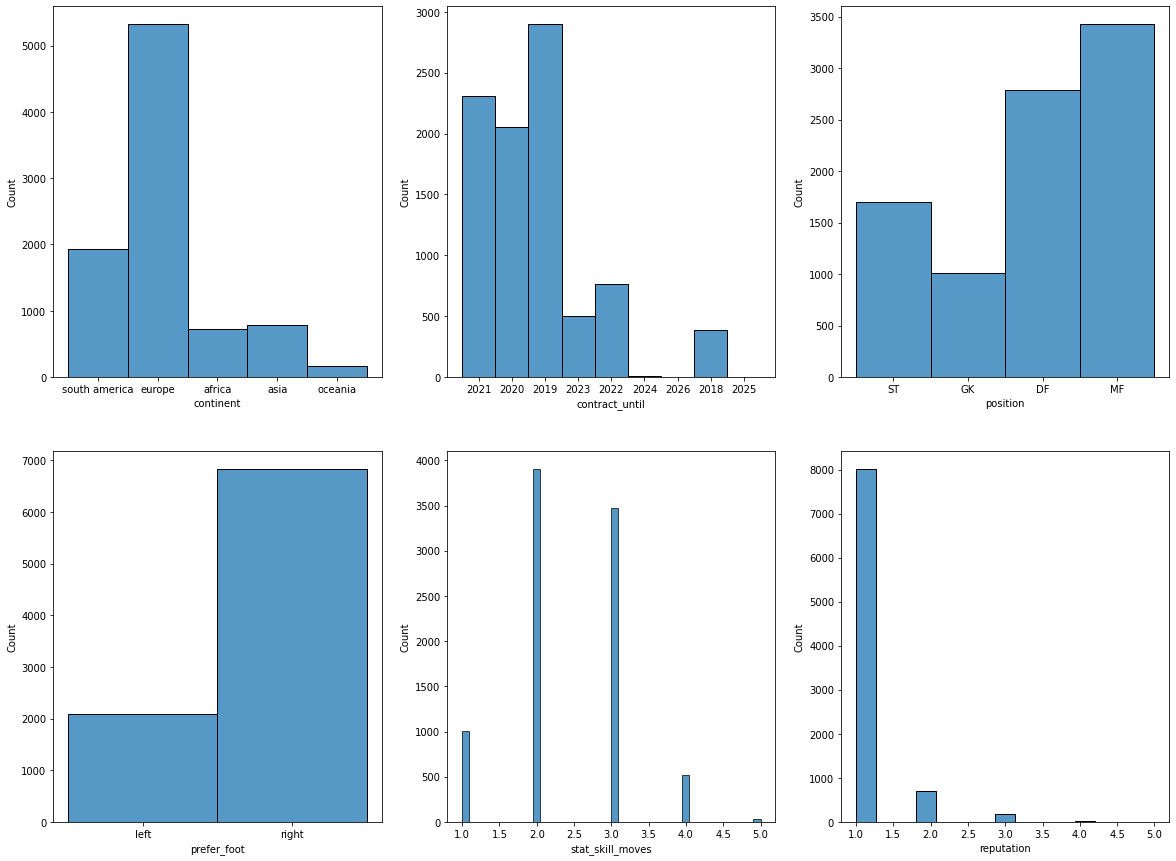

In [13]:
fig, axs=plt.subplots(2, 3, figsize=(20, 15))

sns.histplot(data=df, x=df_object['continent'], ax=axs[0, 0])
sns.histplot(data=df, x=df_object['contract_until'], ax=axs[0, 1])
sns.histplot(data=df, x=df_object['position'], ax=axs[0, 2])
sns.histplot(data=df, x=df_object['prefer_foot'], ax=axs[1, 0])
sns.histplot(data=df, x=df_object['stat_skill_moves'], ax=axs[1, 1])
sns.histplot(data=df, x=df_object['reputation'], ax=axs[1, 2])

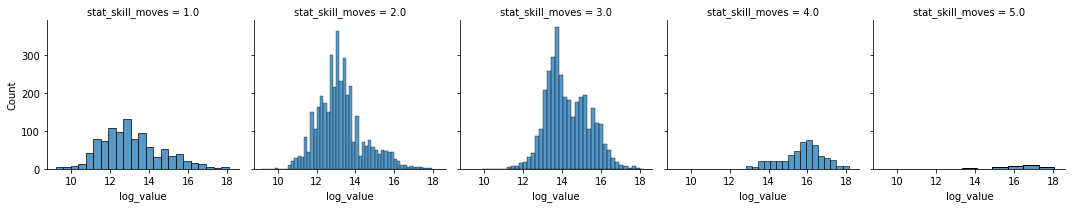

In [14]:
grid = sns.FacetGrid(data=df, col='stat_skill_moves')
grid.map(sns.histplot, 'log_value')

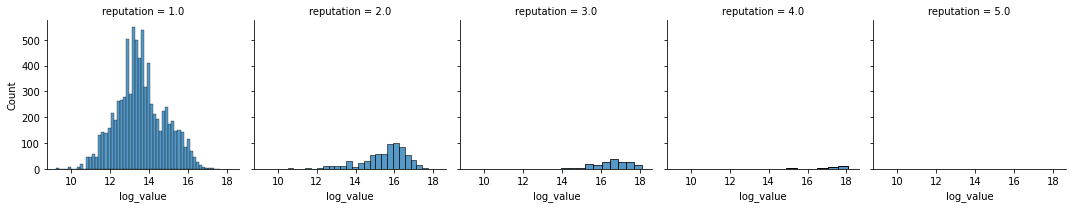

In [15]:
grid = sns.FacetGrid(data=df, col='reputation')
grid.map(sns.histplot, 'log_value')

- 스킬무브가 높다면 value도 높은 쪽으로 분포가 옮겨간다.
- 평판도 같다.

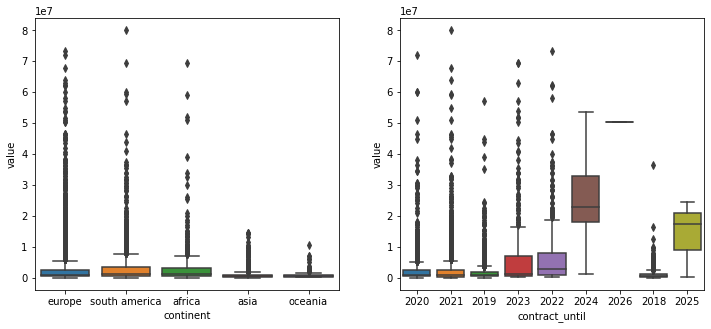

In [16]:
fig, axs=plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y='value', x='continent', data=df, ax=axs[0])
sns.boxplot(y='value', x='contract_until', data=df, ax=axs[1])


- contract_until 2024, 2025, 2026에서 높은 이유는?

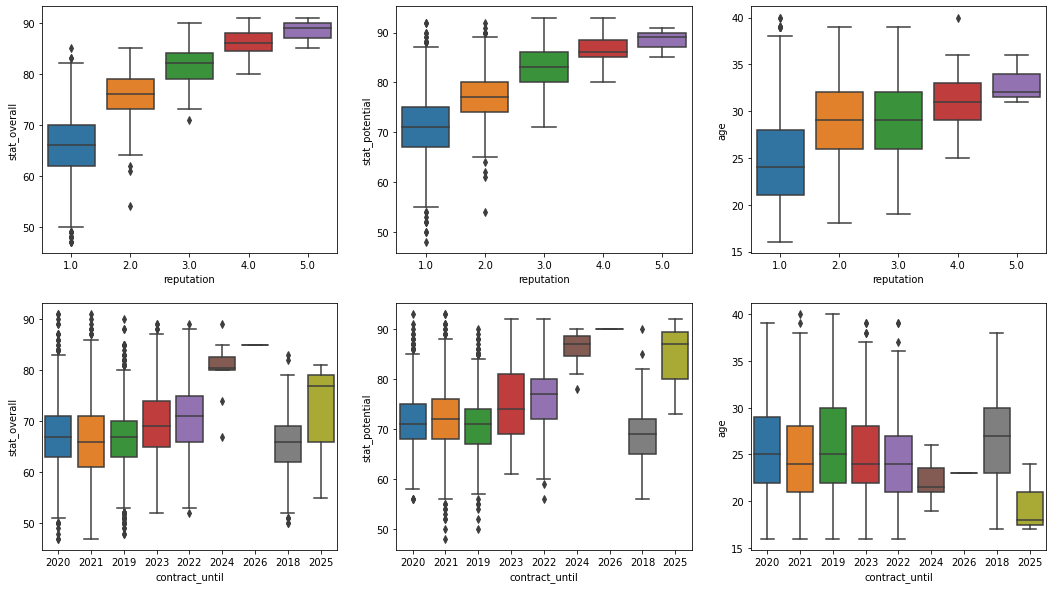

In [17]:
fig, axs=plt.subplots(2,3, figsize=(18,10))
sns.boxplot(y='stat_overall', x='reputation', data=df, ax=axs[0, 0])
sns.boxplot(y='stat_potential', x='reputation', data=df, ax=axs[0, 1])
sns.boxplot(y='age', x='reputation', data=df, ax=axs[0, 2])
sns.boxplot(y='stat_overall', x='contract_until', data=df, ax=axs[1, 0])
sns.boxplot(y='stat_potential', x='contract_until', data=df, ax=axs[1, 1])
sns.boxplot(y='age', x='contract_until', data=df, ax=axs[1, 2])

- 평판이 좋을수록 실력이 좋다고 생각할 수 있다. 다만 상식적으로 실력이 좋아야 평판이 좋다고 할 수 있다는 점을 생각하자.
- contract_until에서의 특징은 잘 보이지 않는다.

# 연속값 그래프

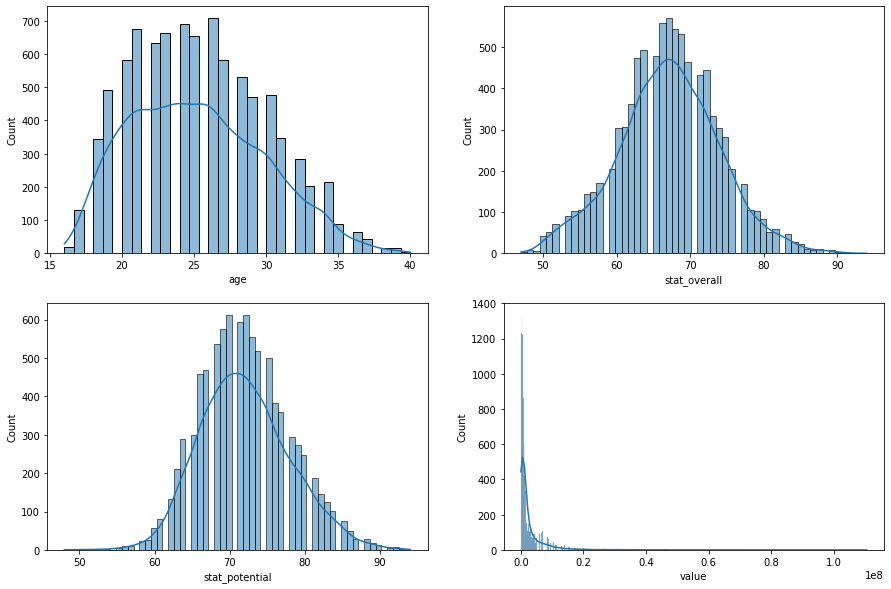

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df_num, x='age', ax=axs[0, 0], kde=True)
sns.histplot(df_num, x='stat_overall', ax=axs[0, 1], kde=True)
sns.histplot(df_num, x='stat_potential', ax=axs[1, 0], kde=True)
sns.histplot(df_num, x='value', ax=axs[1, 1], kde=True)

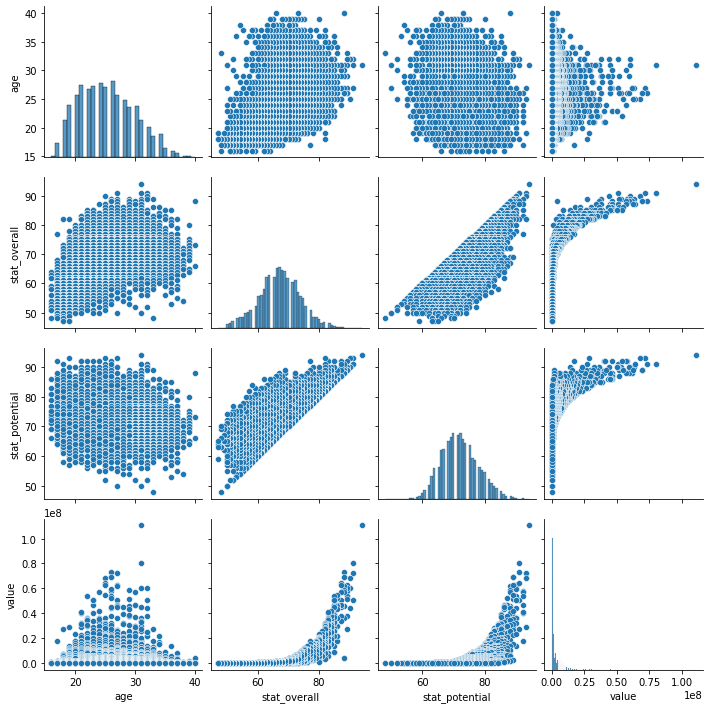

In [19]:
sns.pairplot(df_num)

# 연봉 히스토그램

[Text(0.5, 1.0, 'Histogram log_Value')]

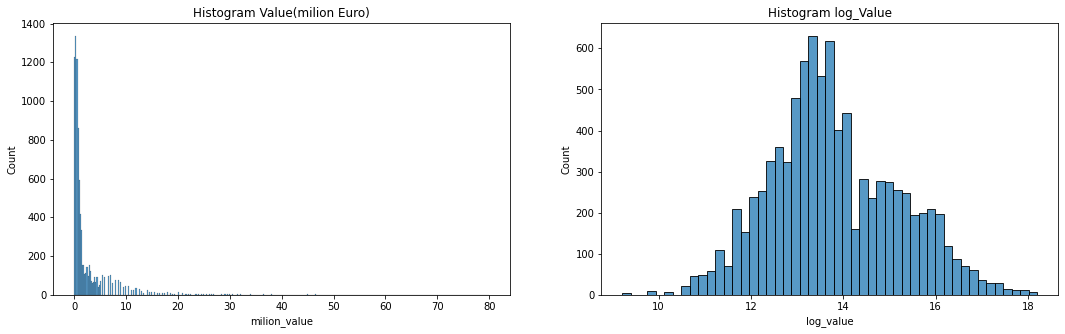

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.histplot(x='milion_value', data=df, ax=axs[0])
axs[0].set(title="Histogram Value(milion Euro)")
sns.histplot(x='log_value', data=df, ax=axs[1])
axs[1].set(title="Histogram log_Value")

# 나이와 연봉 그래프

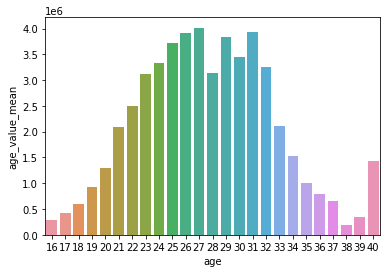

In [21]:
group_mean = df.groupby('age')['value'].agg(**{'age_value_mean':'mean'}).reset_index()

sns.barplot(x='age', y='age_value_mean', data=group_mean)

- 25~32세가 선수의 연봉이 대체로 높다.

In [22]:
'''
cut_point = df['value'].quantile(0.99)
df_cut=df[df['value'] < cut_point]
df_cut
'''


"\ncut_point = df['value'].quantile(0.99)\ndf_cut=df[df['value'] < cut_point]\ndf_cut\n"

# 포지션별

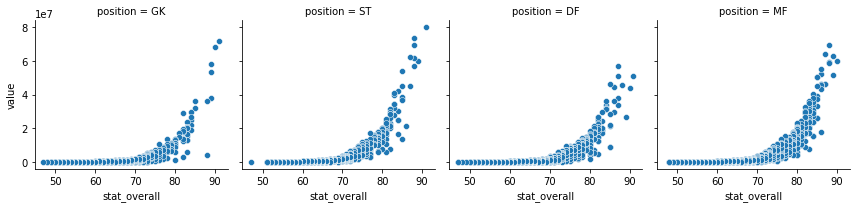

In [23]:
grid = sns.FacetGrid(data=df, col='position')
grid.map(sns.scatterplot, 'stat_overall', 'value')

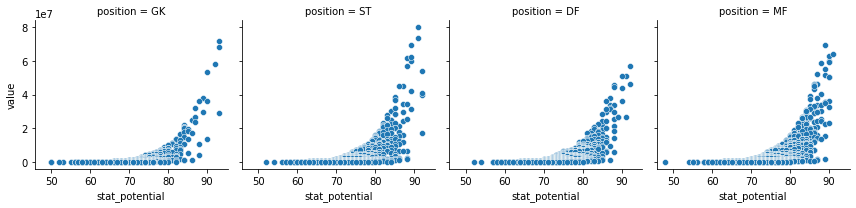

In [24]:
grid = sns.FacetGrid(data=df, col='position')
grid.map(sns.scatterplot, 'stat_potential', 'value')

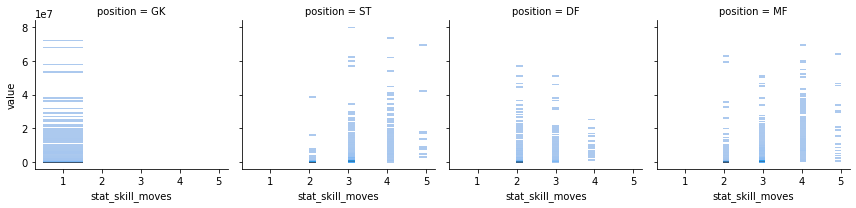

In [25]:
grid = sns.FacetGrid(data=df, col='position')
grid.map(sns.histplot, 'stat_skill_moves', 'value')

- position-overall은 position별로 유동성이 많지는 않다.
- one-hot encoding?

# 대륙

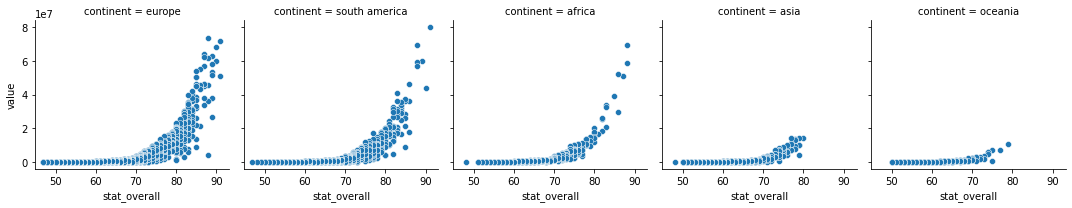

In [26]:
# 대륙별 전체스탯과 이적료 그래프
grid = sns.FacetGrid(data=df, col='continent')
grid.map(sns.scatterplot, 'stat_overall', 'value')

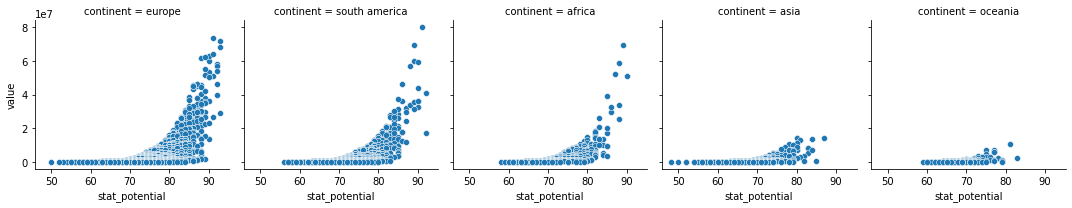

In [27]:
# 대륙별 포텐셜과 이적료 그래프
grid = sns.FacetGrid(data=df, col='continent')
grid.map(sns.scatterplot, 'stat_potential', 'value')

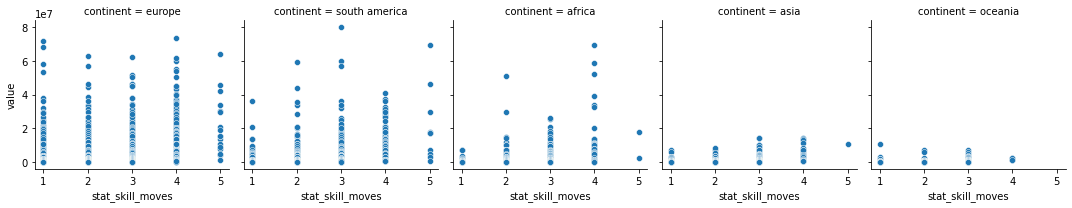

In [28]:
# 대륙별 스킬무브와 이적료 그래프
grid = sns.FacetGrid(data=df, col='continent')
grid.map(sns.scatterplot, 'stat_skill_moves', 'value')

- 대륙별로 overall 스탯차이가 존재하므로 가중값을 줘야 함. one-hot
- overall과 potential의 연관성은 어떨까?

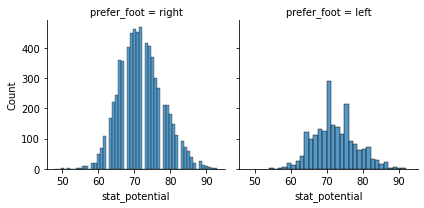

In [29]:
# 주발별 log_value와 이적료 히스토그램
grid = sns.FacetGrid(data=df, col='prefer_foot')
grid.map(sns.histplot, 'stat_potential')

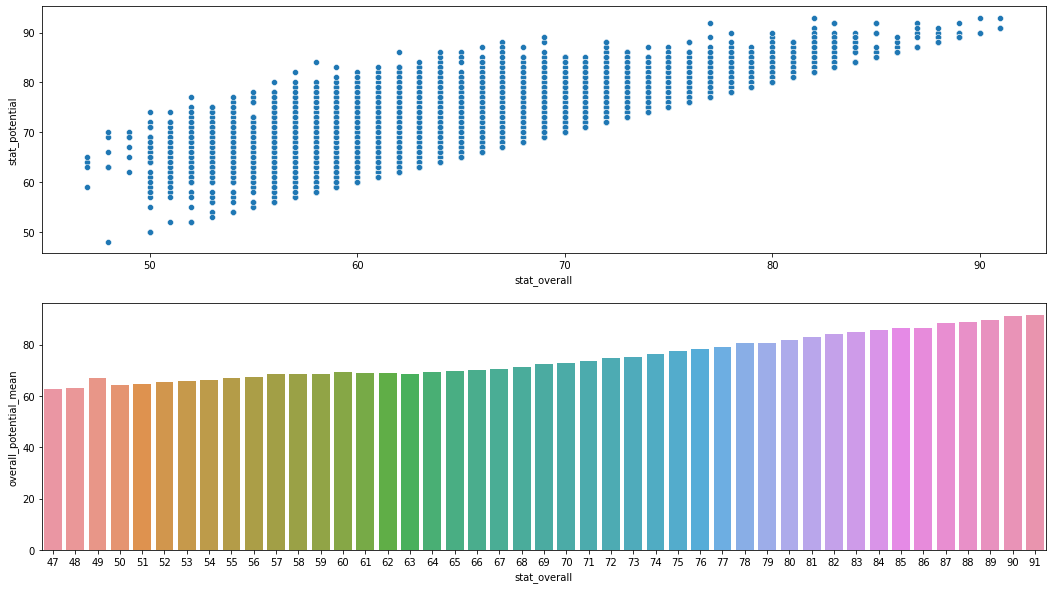

In [30]:
group_mean = df.groupby('stat_overall')['stat_potential'].agg(**{'overall_potential_mean':'mean'}).reset_index()

fig, axs=plt.subplots(2, 1, figsize=(18, 10))
sns.scatterplot(x='stat_overall', y='stat_potential', data=df, ax=axs[0])
sns.barplot(x='stat_overall', y='overall_potential_mean', data=group_mean, ax=axs[1])


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


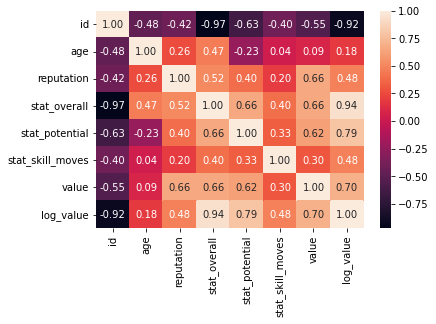

In [31]:
df.drop(columns = 'milion_value', inplace=True)
sns.heatmap(df.corr(), annot=True, fmt='.2f')

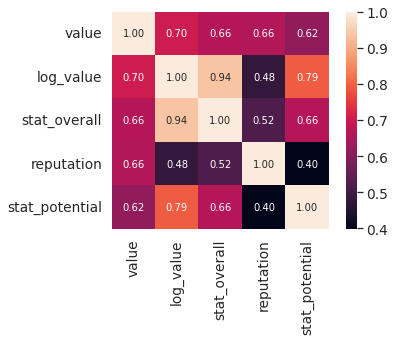

In [32]:
def draw_top_corrmat(df,y,k):
  #k is choosing top k corrleation variables for the heatmap
  y_corrmat = df.corr()
  y_cols = y_corrmat.nlargest(k, y)[y].index
  cm = np.corrcoef(df[y_cols].values.T)
  sns.set(font_scale=1.25)
  f, ax = plt.subplots(figsize=(6,4))
  hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=y_cols.values, xticklabels=y_cols.values)
  plt.show()
    
draw_top_corrmat(df,'value',5)

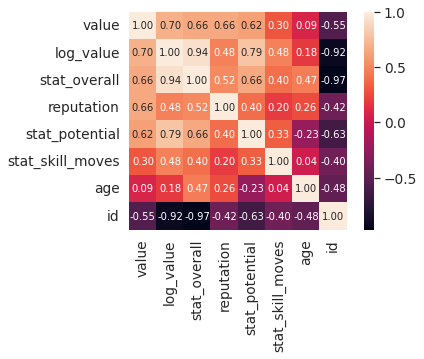

In [33]:
## df.drop(columns='log_value', inplace=True)
draw_top_corrmat(df, 'value', 8)

# train-set 전처리

In [34]:
df_proc = pd.concat([df, pd.get_dummies(df['continent'])], axis = 1)

In [35]:
df_proc = pd.concat([df_proc, pd.get_dummies(df['position'])], axis = 1)

In [36]:
df_proc = pd.concat([df_proc, pd.get_dummies(df['prefer_foot'])], axis = 1)

In [37]:
df_proc

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,...,asia,europe,oceania,south america,DF,GK,MF,ST,left,right
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,...,0,1,0,0,0,1,0,0,0,1
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,...,0,0,0,1,0,0,0,1,0,1
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,...,0,1,0,0,1,0,0,0,0,1
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,...,0,1,0,0,0,1,0,0,0,1
5,12,D. Godín,32,south america,2019,DF,right,3.0,90,90,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,...,0,0,0,0,0,0,1,0,0,1
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,...,0,1,0,0,1,0,0,0,0,1
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,...,0,0,0,1,1,0,0,0,0,1
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,...,0,1,0,0,0,1,0,0,0,1


In [38]:
df_proc.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value', 'log_value', 'africa', 'asia', 'europe',
       'oceania', 'south america', 'DF', 'GK', 'MF', 'ST', 'left', 'right'],
      dtype='object')

In [39]:
features =  ['age', 'contract_until','reputation','stat_overall',	'stat_potential', 'africa', 'asia', 'europe', 'oceania', 'south america', 'DF', 'GK','MF', 'ST', 'left', 'right']
target = 'value'

# test-set 전처리

In [40]:
test_proc = pd.concat([test, pd.get_dummies(test['continent'])], axis = 1)

In [41]:
test_proc = pd.concat([test_proc, pd.get_dummies(test['position'])], axis = 1)

In [42]:
test_proc = pd.concat([test_proc, pd.get_dummies(test['prefer_foot'])], axis = 1)

In [43]:
test_proc

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,...,asia,europe,oceania,south america,DF,GK,MF,ST,left,right
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,...,0,1,0,0,0,0,0,1,0,1
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,...,0,0,0,1,0,0,0,1,0,1
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,...,0,1,0,0,0,0,1,0,0,1
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,...,0,1,0,0,0,0,0,1,0,1
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,...,1,0,0,0,0,0,1,0,0,1
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,...,0,1,0,0,0,1,0,0,0,1
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,...,0,0,0,1,0,0,1,0,0,1
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,...,0,1,0,0,0,0,0,1,0,1


In [44]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [45]:
test_proc.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'africa', 'asia', 'europe', 'oceania',
       'south america', 'DF', 'GK', 'MF', 'ST', 'left', 'right'],
      dtype='object')

In [46]:
test_features =  ['contract_until','reputation','stat_overall',	'stat_potential', 'africa', 'asia', 'europe', 'oceania', 'south america', 'DF', 'GK', 'MF', 'ST', 'left', 'right']
test_target = 'value'

In [48]:
#하이퍼 파라미터 튜닝 전 정확도

from sklearn.ensemble import RandomForestRegressor

x = df_proc[features]
y = df_proc[target]

model = RandomForestRegressor(random_state = 15)
model.fit(x,y)

train_score = model.score(x,y)
print('결정계수: ', train_score)

결정계수:  0.9972761047169615


In [51]:
for i in (10, 20, 30, 40, 100, 150, 200, 250):
  model = RandomForestRegressor(n_estimators = i, random_state = 15)
  model.fit(x,y)

  train_score = model.score(x,y)
  print('결정계수: ', train_score)

결정계수:  0.9958027205341056
결정계수:  0.9965198222610826
결정계수:  0.9964972773586023
결정계수:  0.9967876097694448
결정계수:  0.9972761047169615
결정계수:  0.9973282198265663
결정계수:  0.9973718729367422
결정계수:  0.9973388453291805


In [52]:
for i in (1,5,10,15,20,30,40,50):
  model = RandomForestRegressor(max_depth = i, random_state = 15)
  model.fit(x,y)

  train_score = model.score(x,y)
  print('결정계수: ', train_score)

결정계수:  0.6276734800711279
결정계수:  0.9752155820670168
결정계수:  0.9959832868046435
결정계수:  0.9972322233691393
결정계수:  0.9973287201541623
결정계수:  0.9972761047169615
결정계수:  0.9972761047169615
결정계수:  0.9972761047169615


In [53]:
for i in (1,5,10,15,16):
  model = RandomForestRegressor(max_features = i, random_state = 15)
  model.fit(x,y)

  train_score = model.score(x,y)
  print('결정계수: ', train_score)

결정계수:  0.9904708545069097
결정계수:  0.9963639153347518
결정계수:  0.9972497508929088
결정계수:  0.9971772612178998
결정계수:  0.9972761047169615


In [54]:
#하이퍼 파라미터 튜닝 후 정확도
model = RandomForestRegressor(n_estimators = 200, max_depth = 16, max_features = 16, random_state = 15)
model.fit(x,y)

train_score = model.score(x,y)
print('결정계수: ', train_score)

결정계수:  0.99730971634029


In [ ]:
#max_depth: 트리의 깊이로서, 랜덤 포레스트 트리의 루트 노드와 리프 노드 사이의 가장 긴 경로를 설정합니다.
#이 매개 변수를 사용하여 임의의 포레스트에있는 모든 트리가 성장할 수있는 깊이를 제한 할 수 있습니다.

#n_estimators: 랜덤 포레스트에서 결정 트리의 개수를 지정합니다.많이 설정할 수록 좋은 성능을 기대할 수 있지만, 계속 증가시킨다고 무조건 향상되는것은 아닙니다.
#또한 적을경우 과소적합이지만 증가에 따른 학습 수행시간 역시 오래걸리게 됩니다

#max_features: 전체에서 선택할 피처 개수 입니다. n_estimators는 클수록 트리의 깊이가 깊어지지만 max_features는 작을수록 트리가 깊어진다고 볼 수 있습니다.

In [ ]:
#그리드 서치(최적의 하이퍼파라미터 찾기)
from sklearn.metrics import accuracy_score


In [57]:
#특성중요도
print(model.feature_importances_)

[3.96330186e-02 1.97885564e-03 1.18336788e-03 8.49038594e-01
 9.46406242e-02 3.96490271e-04 3.45986976e-05 7.62752111e-04
 8.62731789e-06 5.11779820e-04 3.63813475e-03 2.99042645e-03
 1.53062352e-03 2.75635093e-03 4.40010756e-04 4.55745497e-04]


In [62]:
feature_importance = pd.DataFrame(model.feature_importances_.reshape((1, -1)), columns=x.columns, index=['feature_importance'])
feature_importance = feature_importance.transpose()
feature_importance = feature_importance.reset_index()
feature_importance = feature_importance.rename(columns = {'index':'feature'})
feature_importance.sort_values(by = 'feature_importance', ascending = False)

,feature,feature_importance
3,stat_overall,0.849039
4,stat_potential,0.094641
0,age,0.039633
10,DF,0.003638
11,GK,0.002990
13,ST,0.002756
1,contract_until,0.001979
12,MF,0.001531
2,reputation,0.001183
7,europe,0.000763


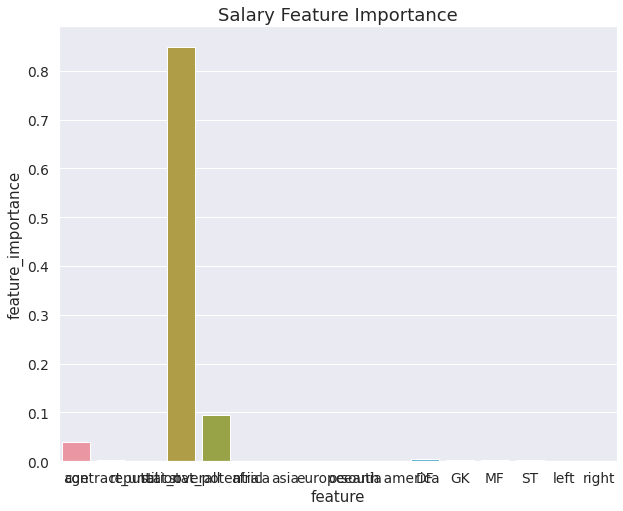

In [63]:
# 순열 중요도 시각화
plt.figure(figsize=(10, 8))

sns.barplot(x='feature', y='feature_importance', data=feature_importance)
plt.title('Salary Feature Importance', fontsize=18)

plt.show()

In [60]:
from sklearn.tree import export_graphviz

estimator = model.estimators_[3]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                class_names = target,
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

# 생성된 .dot 파일을 .png로 변환
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
from IPython.display import Image
Image(filename = 'decistion-tree.png')